# EDA

In [9]:
# 필요한 라이브러리

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


## 데이터 불러오기

In [11]:
data = pd.read_csv("data/final_data.csv")

In [12]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,1,0,0,05-16,15,일,주말,비옴,흐림,점심
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,1,05-24,16,월,평일,비안옴,맑음,저녁
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,1,0,05-24,16,월,평일,비안옴,맑음,저녁
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,1,0,0,05-24,16,월,평일,비안옴,맑음,저녁
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,0,05-24,16,월,평일,비안옴,맑음,저녁


## 설문데이터 시각화

### pie그래프 함수 정의

In [13]:
# pie그래프 함수
def pieplot(column): 
    tmp=data[column].value_counts()
    colors = ['#ff9999', '#8fd9b6', '#ffc000', '#d395d0','#ffcc99']
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    plt.pie(tmp.values, labels=tmp.index, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)

### 인류통계학 정보 시각화

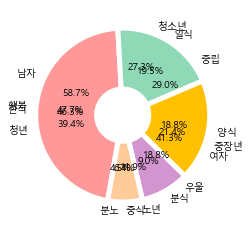

In [14]:
pieplot(column="성별")
pieplot(column="기분")
pieplot(column="연령대")
pieplot(column="1순위")

### 파생변수 시각화

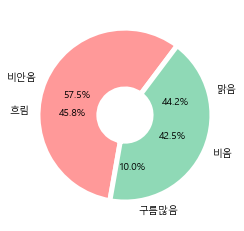

In [15]:
# 날씨 파생변수(구름,비)
pieplot("구름")
pieplot("비")

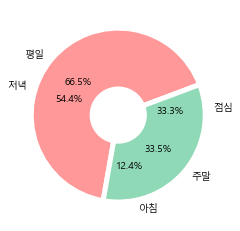

In [16]:
# 날짜,시간 파생변수(식사시간,휴일)
pieplot("식사시간")
pieplot("휴일")

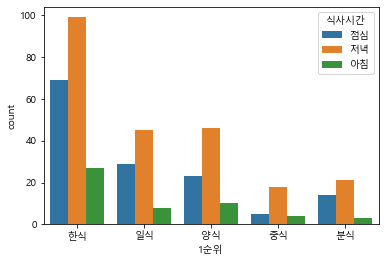

In [17]:
ax=sns.countplot(x="1순위", data=data,hue="식사시간")

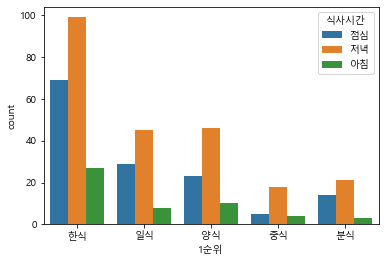

In [18]:
ax=sns.countplot(x="1순위", data=data,hue="식사시간")

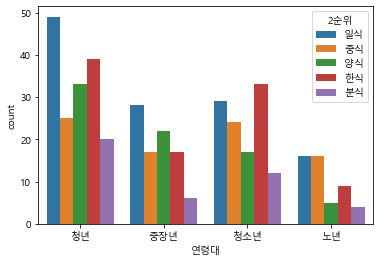

In [19]:
ax=sns.countplot(x="연령대", data=data,hue="2순위")

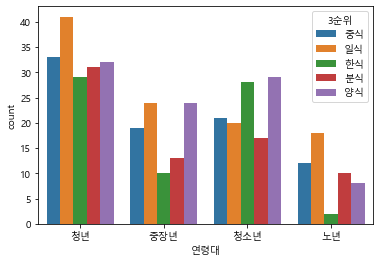

In [20]:
ax=sns.countplot(x="연령대", data=data,hue="3순위")

# 함수
### - 오름차순 정렬 함수 정의

In [21]:
def ascend_sum(df):
    df['합계'] = df.sum(axis=1)
    df = df.sort_values('합계', ascending=True) # 합계를 기준으로 정렬
    df = df.iloc[:, :-1] # 합계 열 제외
    return df

### - 막대 그래프 함수 정의

In [22]:
def stack_bar(df, kind='bar', text=None, stack=False):
    df.plot(kind=kind, figsize=(10,10), fontsize=15, stacked=stack),
    plt.ylabel(''),
    plt.title(text),
    plt.show()

### - 메뉴 리스트 저장

In [23]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
             '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

# EDA
### (1) 성별, 연령대별 1순위 음식 분류

In [24]:
a1 = data.pivot_table("기온",
                      columns=["성별","연령대"],
                      index="1순위",
                      aggfunc="count")
a1

성별     남자                      여자                  
연령대    노년   중장년    청년   청소년    노년   중장년    청년   청소년
1순위                                                
분식    2.0   1.0   3.0   7.0   2.0   5.0  10.0   8.0
양식    NaN   6.0  21.0  25.0   2.0   5.0  15.0   5.0
일식    4.0   2.0  22.0  22.0   4.0   3.0  15.0  10.0
중식    2.0   6.0   4.0   8.0   NaN   3.0   4.0   NaN
한식   19.0  33.0  43.0  17.0  15.0  26.0  29.0  13.0

In [25]:
a1 = ascend_sum(a1)
a1

성별     남자                      여자                  
연령대    노년   중장년    청년   청소년    노년   중장년    청년   청소년
1순위                                                
중식    2.0   6.0   4.0   8.0   NaN   3.0   4.0   NaN
분식    2.0   1.0   3.0   7.0   2.0   5.0  10.0   8.0
양식    NaN   6.0  21.0  25.0   2.0   5.0  15.0   5.0
일식    4.0   2.0  22.0  22.0   4.0   3.0  15.0  10.0
한식   19.0  33.0  43.0  17.0  15.0  26.0  29.0  13.0

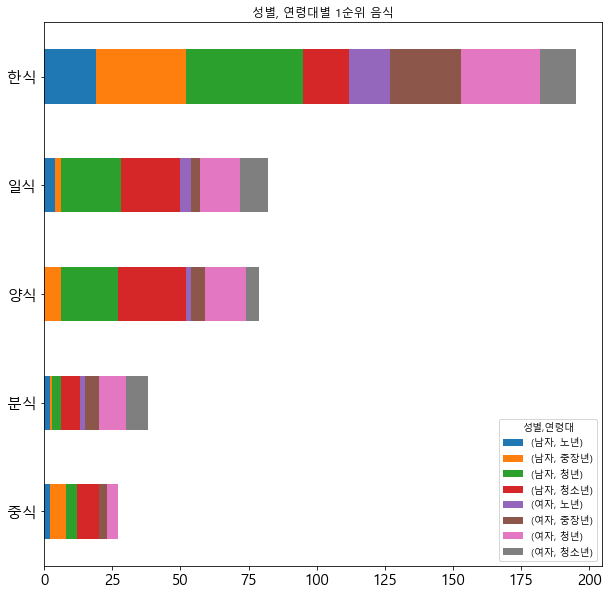

In [26]:
stack_bar(a1, kind='barh', text='성별, 연령대별 1순위 음식', stack=True)

### (2) 성별에 따른 메뉴 분포

In [27]:
a2 = ascend_sum(data.groupby('성별')[menu_list].sum().T)
a2

성별,남자,여자
볶음밥,37,24
김밥,32,41
칼국수,42,32
우동,43,36
햄버거,61,26
짬뽕,65,27
짜장면,69,28
냉면,58,40
된장찌개,61,40
메밀소바,56,45


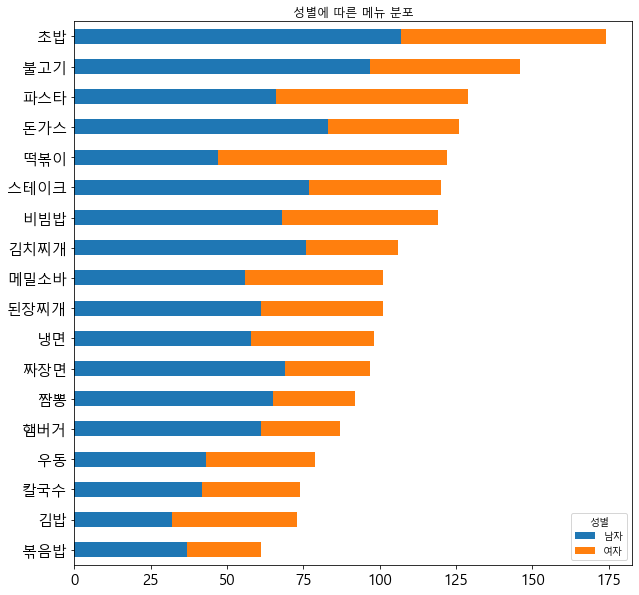

In [28]:
stack_bar(a2, kind='barh', text='성별에 따른 메뉴 분포', stack=True)

### (3) 기분에 따른 메뉴 분포

In [29]:
a3 = ascend_sum(data.groupby('기분')[menu_list].sum().T)
a3

기분,분노,우울,중립,행복
볶음밥,5,12,20,24
김밥,2,16,25,30
칼국수,2,14,25,33
우동,1,13,27,38
햄버거,3,18,30,36
짬뽕,3,16,32,41
짜장면,7,16,35,39
냉면,5,17,27,49
된장찌개,1,19,33,48
메밀소바,3,25,35,38


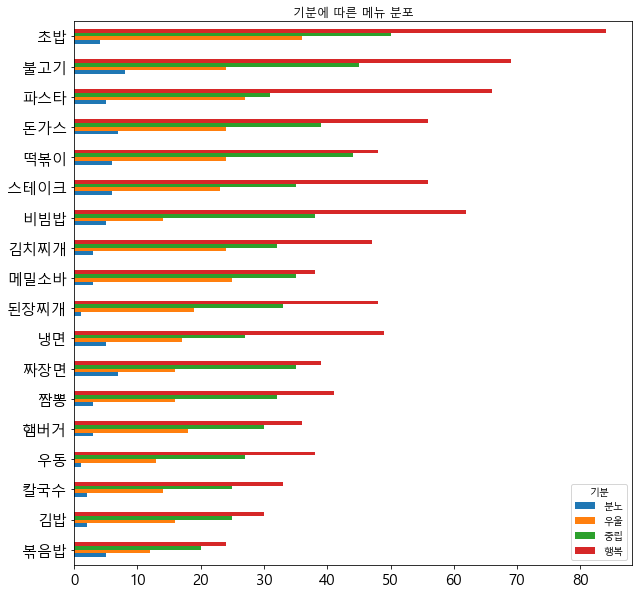

In [30]:
stack_bar(a3, kind='barh', text='기분에 따른 메뉴 분포')

### (4) 요일에 따른 메뉴

In [31]:
a4 = data.groupby(['요일']).sum()[menu_list]
a4

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
요일,,,,,,,,,,,,,,,,,,
목,5,3,2,4,2,4,4,3,6,3,4,3,2,4,6,4,2,2
수,12,14,6,8,10,5,13,6,16,13,9,16,6,8,12,4,8,9
월,24,12,9,21,19,17,19,20,17,11,16,31,16,23,23,17,22,11
일,53,35,34,40,46,46,47,18,45,54,35,61,32,32,46,21,42,44
토,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,2,0
화,51,32,23,28,42,34,39,26,45,39,23,61,23,33,39,14,21,26


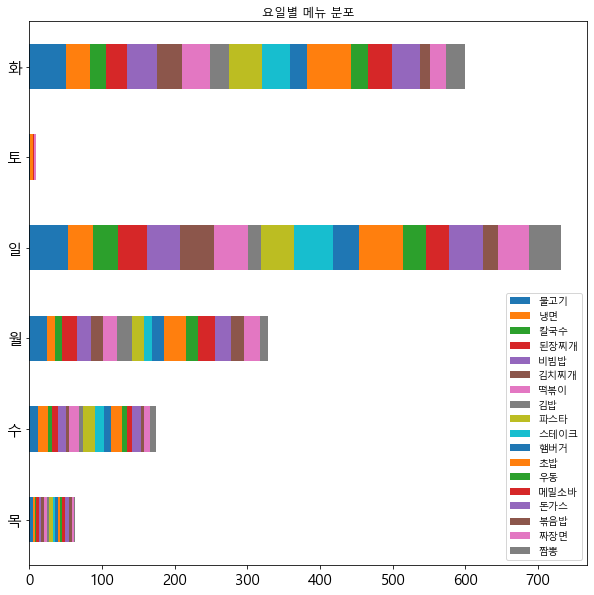

In [32]:
stack_bar(a4, kind='barh', text='요일별 메뉴 분포', stack=True)

### (5) 연령에 따른 전체메뉴

In [33]:
a5 = ascend_sum(data.groupby(['연령대']).sum()[menu_list])
a5

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
연령대,,,,,,,,,,,,,,,,,,
노년,13,6,6,9,9,7,6,12,4,5,7,15,10,11,10,12,10,11
중장년,34,15,8,16,33,14,14,13,21,30,8,36,5,21,7,10,17,21
청소년,45,44,33,32,31,36,43,16,41,46,32,53,36,29,39,14,32,31
청년,54,33,27,44,46,49,59,32,63,39,40,70,28,40,70,25,38,29


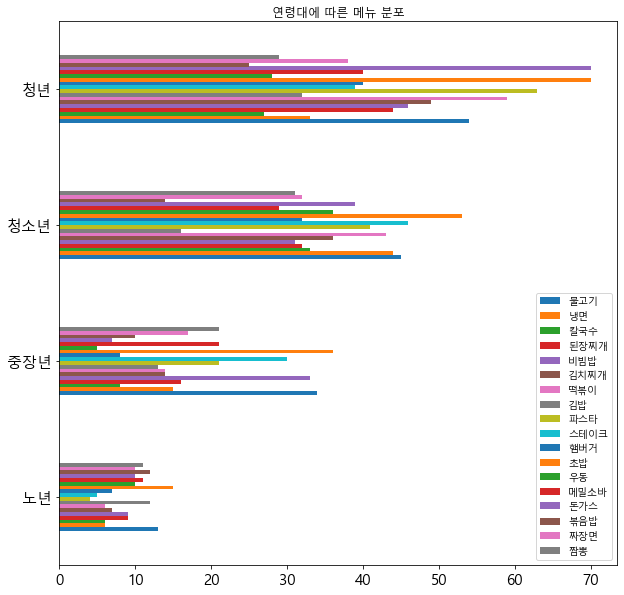

In [34]:
stack_bar(a5, kind='barh', text='연령대에 따른 메뉴 분포', stack=False)

### (6) 시간대에 따른 메뉴

In [35]:
a6 = ascend_sum(data.groupby('시간')[menu_list].sum().T)
a6

시간,0,2,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
볶음밥,2,0,0,0,0,3,3,2,5,4,5,6,13,6,3,1,5,2,0,1
김밥,0,0,0,0,0,7,3,0,5,5,7,10,12,9,3,1,2,4,4,1
칼국수,1,0,0,1,0,3,3,1,4,5,8,5,11,20,3,0,5,2,0,2
우동,1,1,0,1,0,3,4,2,3,4,9,8,12,16,2,1,6,1,2,3
햄버거,1,0,0,1,1,3,5,1,7,3,4,6,17,17,5,1,3,6,4,2
짬뽕,2,0,0,0,0,0,5,1,7,7,11,4,13,21,4,2,9,4,2,0
짜장면,1,0,0,0,1,6,6,2,6,7,2,4,15,22,7,2,8,3,3,2
냉면,0,0,1,0,0,4,4,3,4,8,12,9,14,21,4,0,10,3,0,1
된장찌개,1,0,0,1,2,5,5,3,11,3,11,4,19,16,4,1,10,2,1,2
메밀소바,1,0,0,0,1,4,5,3,11,6,9,13,17,17,6,0,2,2,2,2


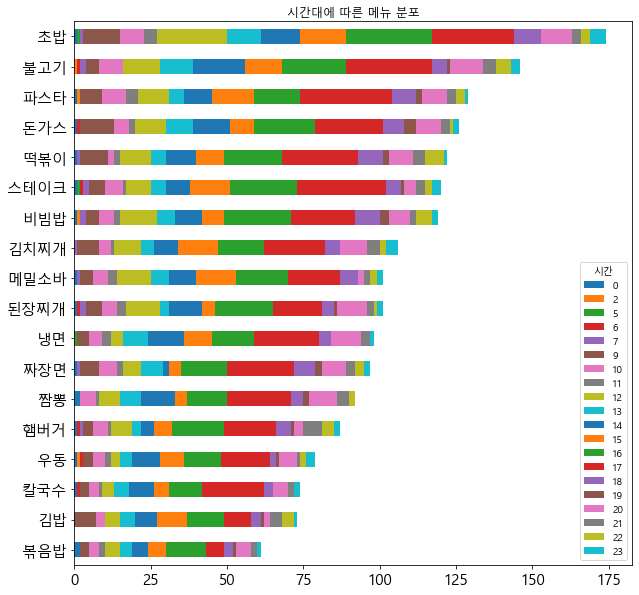

In [36]:
stack_bar(a6, kind='barh', text='시간대에 따른 메뉴 분포', stack=True)

### (7) 기온에 따른 메뉴

In [37]:
a7 = data.groupby(['기온']).sum()[menu_list].reset_index()
a7

,기온,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,10.7,1,1,1,1,0,0,0,0,0,2,1,1,1,0,1,0,0,0
1,13.3,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,2
2,13.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,14.0,2,1,1,1,2,1,2,2,0,0,0,1,1,2,0,0,0,0
4,14.3,2,0,0,0,0,2,1,1,0,0,2,1,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,25.7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
69,25.9,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
70,26.2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
71,26.3,0,0,0,4,1,1,1,1,2,2,1,1,1,0,2,0,0,0


In [38]:
a7["구간"] = pd.cut(a7["기온"], 5, right=False)

In [39]:
a7 = a7.groupby(['구간']).sum().iloc[:, 1:]
a7

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
구간,,,,,,,,,,,,,,,,,,
"[10.7, 13.86)",1,1,2,1,1,0,1,0,1,3,2,3,2,1,2,1,2,2
"[13.86, 17.02)",29,11,12,24,26,26,28,21,24,18,24,37,16,24,30,13,23,8
"[17.02, 20.18)",50,37,33,38,38,43,45,17,48,51,30,55,31,29,43,21,41,41
"[20.18, 23.34)",52,40,22,27,46,29,37,26,42,40,20,65,25,39,40,17,23,30
"[23.34, 26.516)",14,9,5,11,8,8,11,9,14,8,11,14,5,8,11,9,8,11


In [40]:
a7.index = '10°C', '15°C', '20°C', '23°C', '25°C'

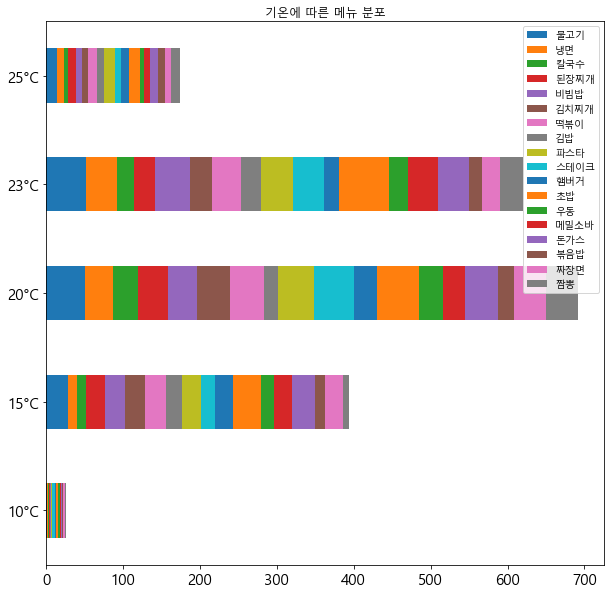

In [41]:
stack_bar(a7, kind='barh', text='기온에 따른 메뉴 분포', stack=True)

# 상관분석

In [42]:
import scipy.stats as stats

In [43]:
# https://datascienceschool.net/03%20machine%20learning/02.02%20%EB%B2%94%EC%A3%BC%ED%98%95%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html

In [44]:
data = data.iloc[:, 1:]
data.head()

,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,습도,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,99.1,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,97.0,...,1,0,0,05-16,15,일,주말,비옴,흐림,점심
2,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,97.0,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,97.0,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,94.7,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁


In [45]:
data.describe()

,기온,강수량,습도,기압,전운량,불고기,냉면,칼국수,된장찌개,비빔밥,...,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,시간
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,19.873159,0.866508,74.862708,996.845131,5.719715,0.346793,0.232779,0.175772,0.239905,0.282660,...,0.285036,0.206651,0.413302,0.187648,0.239905,0.299287,0.144893,0.230404,0.218527,15.140143
std,2.954757,1.301115,21.736502,5.867039,4.087998,0.476516,0.423105,0.381079,0.427533,0.450828,...,0.451969,0.405385,0.493012,0.390896,0.427533,0.458491,0.352412,0.421592,0.413739,3.699013
min,10.700000,0.000000,28.000000,980.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,0.000000,57.000000,990.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,20.100000,0.000000,82.000000,998.600000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
75%,22.000000,1.900000,95.000000,1001.700000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000
max,26.500000,7.200000,99.400000,1006.200000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000


# 함수
### - 상관계수 함수 정의
#### 범주형 데이터용 : One-Hot Encoding 한 후에 상관분석

In [46]:
def correlation(data, method=None):
    
    # One-Hot Encoding
    data = pd.get_dummies(data)
    
    # Correlation Coefficient
    corr = data.corr(method=method)
    

    # Visualization
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr,
                annot=True,
                fmt='.2f',
                linewidths=.3,
                cmap='Greens')
    plt.show()
    
    return corr

#### 수치형 데이터용

In [47]:
def no_onehot_corr(data, method=None,size=10):
    
    # Correlation Coefficient
    corr = data.corr(method=method)

    
    # Visualization
    fig, ax = plt.subplots(figsize=(size,size))
    sns.heatmap(corr,
                annot=True,
                fmt='.2f',
                linewidths=.3,
                cmap='Greens')
    plt.show()
    
    return corr

### (1) 수치형
### - Heatmap 함수 정의

In [48]:
def tri_heatmap(data):
    
    # Correlation Coefficient
    data = data.corr()
    

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8,8))
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data,
                annot=True,
                mask=mask,
                cmap='RdYlBu_r',
                linewidths=.5,
                cbar_kws={"shrink": .5},
                vmin=-1, vmax=1)
    plt.show()
    
    return data

### (2) 범주형 함수
### - 카이제곱검정 함수 정의

In [49]:
def chi_square(data):
    
    # One-Hot Encoding
    # data = pd.get_dummies(data)
    
    
    # Chi-Squared Test
    chi, pvalue, dof, expected = stats.chi2_contingency(data)

    print("Chi Square: {}".format(chi),
          "P-value: {}".format(pvalue),
          "자유도 수: {}".format(dof),
          "기대값: {}".format(pd.DataFrame(expected)),
          "측정값: {}".format(data), sep="\n")

# 분석
- 수치형 변수 : Pearson Correlation Coefficient
- 범주형 변수 : Spearman Correlation Coefficient, Kendall Rank Correlation Coefficient (순위척도)

### (1) 수치형 (기온, 강수량, 습도, 기압, 전운량, 시간)

In [50]:
numerical = data[['기온', '강수량', '습도', '기압', '전운량', '시간']]
numerical

,기온,강수량,습도,기압,전운량,시간
0,17.5,1.6,99.1,993.6,10,14
1,18.5,1.4,97.0,989.6,10,15
2,18.5,1.4,97.0,989.6,10,15
3,18.5,1.4,97.0,989.6,10,15
4,20.6,2.6,94.7,990.5,10,16
...,...,...,...,...,...,...
416,23.8,0.0,52.2,994.6,3,16
417,22.1,0.0,45.1,999.9,1,16
418,22.7,0.0,57.0,997.9,1,16
419,22.7,0.0,57.0,997.9,1,16


##### 피어슨 상관계수

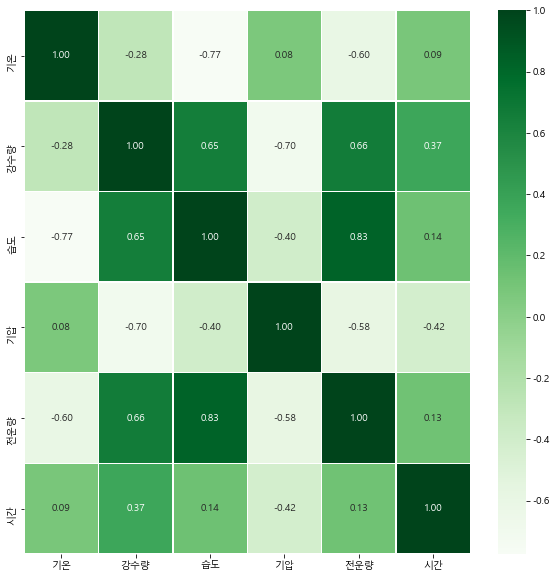

,기온,강수량,습도,기압,전운량,시간
기온,1.000000,-0.283386,-0.774244,0.075298,-0.601449,0.091338
강수량,-0.283386,1.000000,0.646806,-0.700074,0.664715,0.367359
습도,-0.774244,0.646806,1.000000,-0.397219,0.832120,0.139990
기압,0.075298,-0.700074,-0.397219,1.000000,-0.582468,-0.418967
전운량,-0.601449,0.664715,0.832120,-0.582468,1.000000,0.128252
시간,0.091338,0.367359,0.139990,-0.418967,0.128252,1.000000


In [51]:
no_onehot_corr(numerical, method='pearson')

##### Heatmap

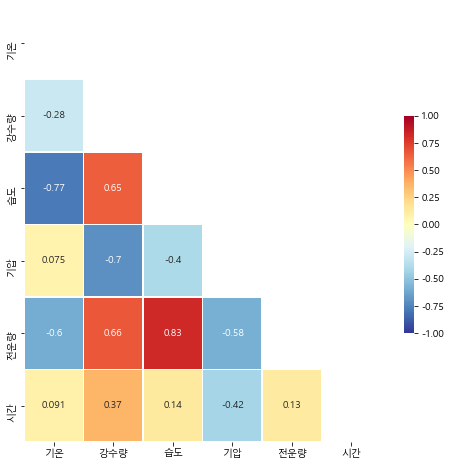

,기온,강수량,습도,기압,전운량,시간
기온,1.000000,-0.283386,-0.774244,0.075298,-0.601449,0.091338
강수량,-0.283386,1.000000,0.646806,-0.700074,0.664715,0.367359
습도,-0.774244,0.646806,1.000000,-0.397219,0.832120,0.139990
기압,0.075298,-0.700074,-0.397219,1.000000,-0.582468,-0.418967
전운량,-0.601449,0.664715,0.832120,-0.582468,1.000000,0.128252
시간,0.091338,0.367359,0.139990,-0.418967,0.128252,1.000000


In [52]:
tri_heatmap(numerical)

##### 산점 행렬도 (SPM : Scatter Plot Matrix)

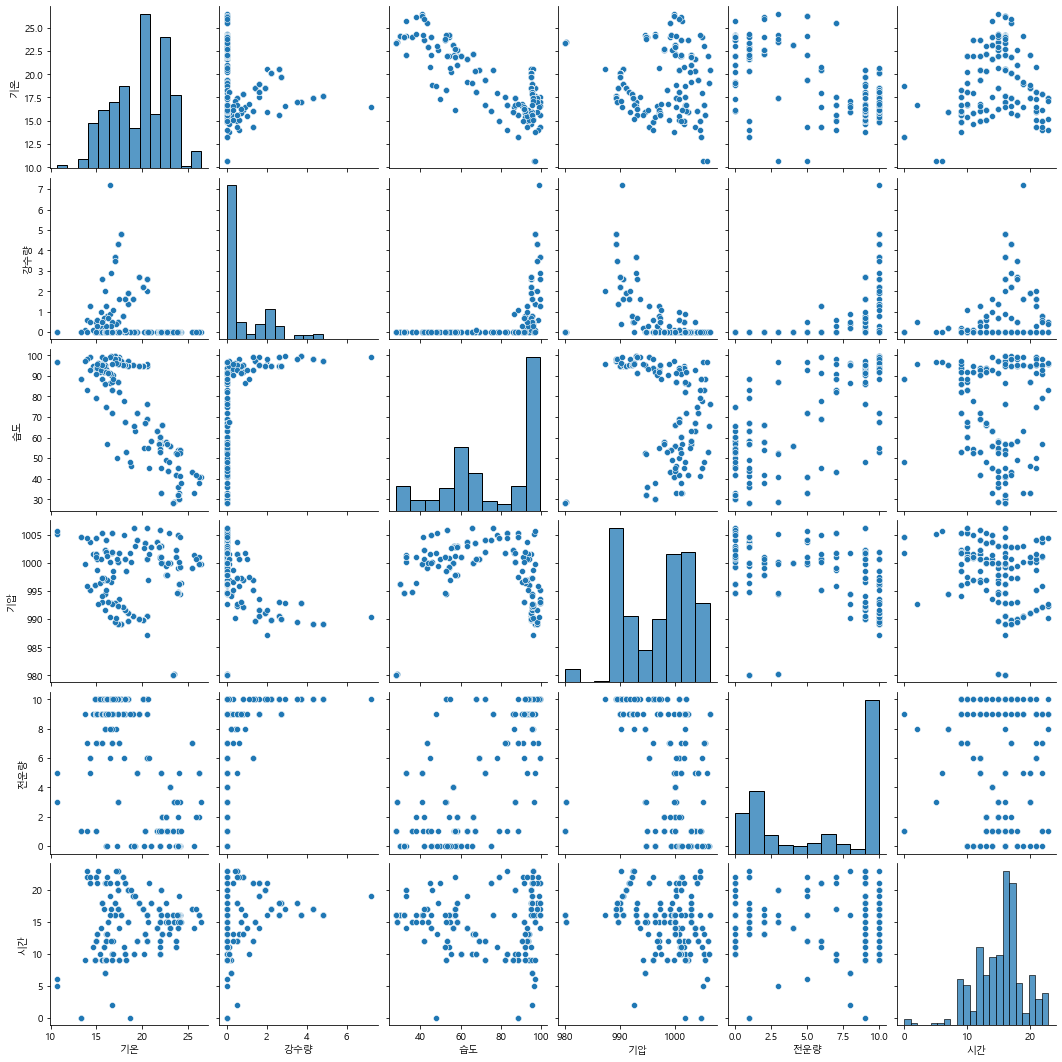

In [53]:
sns.pairplot(data=numerical)
plt.show()

### (2) 범주형
### 명목형 (성별, 연령대, 기분)

In [54]:
data

,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,습도,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,99.1,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,97.0,...,1,0,0,05-16,15,일,주말,비옴,흐림,점심
2,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,97.0,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,97.0,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,94.7,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,52.2,...,0,0,1,05-24,16,월,평일,비안옴,맑음,저녁
417,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,45.1,...,0,1,0,05-24,16,월,평일,비안옴,맑음,저녁
418,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,57.0,...,1,0,0,05-24,16,월,평일,비안옴,맑음,저녁
419,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,57.0,...,0,0,0,05-24,16,월,평일,비안옴,맑음,저녁


In [55]:
norminal = data[['성별', '연령대', '기분']]
norminal

,성별,연령대,기분
0,남자,청년,행복
1,여자,중장년,분노
2,남자,청년,중립
3,여자,청년,행복
4,남자,청년,행복
...,...,...,...
416,남자,노년,행복
417,남자,노년,행복
418,여자,노년,행복
419,남자,노년,우울


##### - One-Hot Encoding 후,
##### 스피어만 상관계수

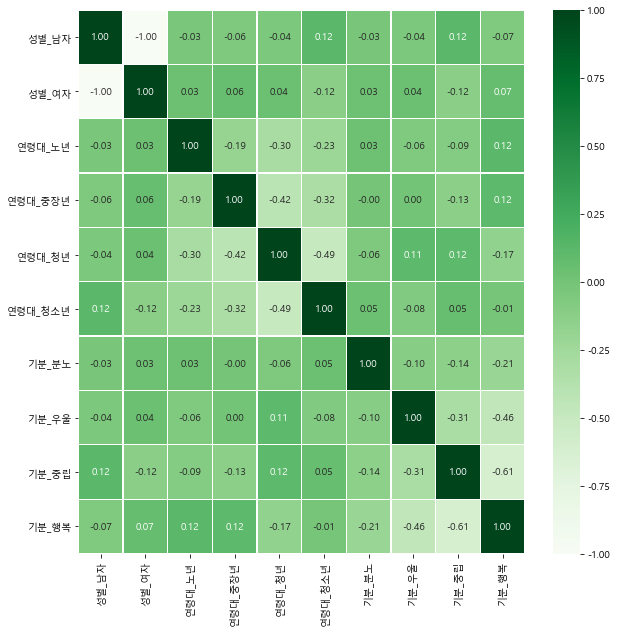

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복
성별_남자,1.000000,-1.000000,-0.034814,-0.056510,-0.043350,0.124815,-0.026658,-0.041378,0.121455,-0.066889
성별_여자,-1.000000,1.000000,0.034814,0.056510,0.043350,-0.124815,0.026658,0.041378,-0.121455,0.066889
연령대_노년,-0.034814,0.034814,1.000000,-0.191428,-0.296198,-0.225054,0.026296,-0.063608,-0.088841,0.119481
연령대_중장년,-0.056510,0.056510,-0.191428,1.000000,-0.420718,-0.319665,-0.001724,0.001657,-0.128743,0.116353
연령대_청년,-0.043350,0.043350,-0.296198,-0.420718,1.000000,-0.494621,-0.058339,0.110177,0.116732,-0.167897
연령대_청소년,0.124815,-0.124815,-0.225054,-0.319665,-0.494621,1.000000,0.046479,-0.076181,0.054929,-0.009658
기분_분노,-0.026658,0.026658,0.026296,-0.001724,-0.058339,0.046479,1.000000,-0.104487,-0.138870,-0.207802
기분_우울,-0.041378,0.041378,-0.063608,0.001657,0.110177,-0.076181,-0.104487,1.000000,-0.307005,-0.459396
기분_중립,0.121455,-0.121455,-0.088841,-0.128743,0.116732,0.054929,-0.138870,-0.307005,1.000000,-0.610564
기분_행복,-0.066889,0.066889,0.119481,0.116353,-0.167897,-0.009658,-0.207802,-0.459396,-0.610564,1.000000


In [56]:
correlation(norminal, method="spearman")

##### 켄달 상관계수

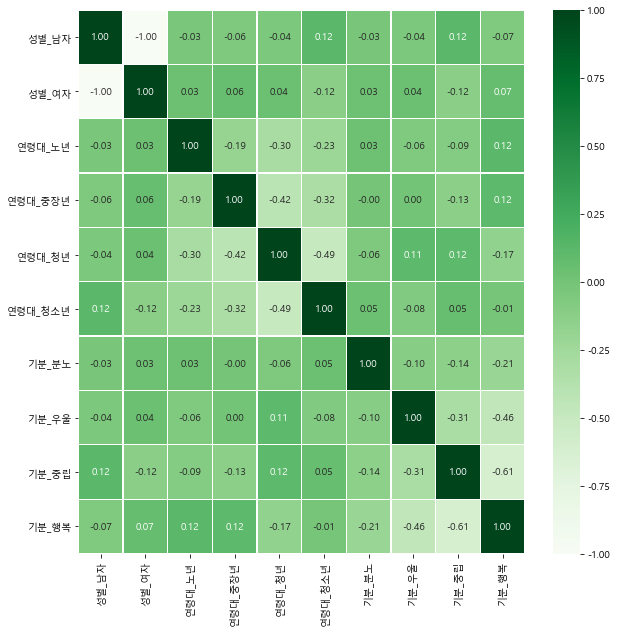

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복
성별_남자,1.000000,-1.000000,-0.034814,-0.056510,-0.043350,0.124815,-0.026658,-0.041378,0.121455,-0.066889
성별_여자,-1.000000,1.000000,0.034814,0.056510,0.043350,-0.124815,0.026658,0.041378,-0.121455,0.066889
연령대_노년,-0.034814,0.034814,1.000000,-0.191428,-0.296198,-0.225054,0.026296,-0.063608,-0.088841,0.119481
연령대_중장년,-0.056510,0.056510,-0.191428,1.000000,-0.420718,-0.319665,-0.001724,0.001657,-0.128743,0.116353
연령대_청년,-0.043350,0.043350,-0.296198,-0.420718,1.000000,-0.494621,-0.058339,0.110177,0.116732,-0.167897
연령대_청소년,0.124815,-0.124815,-0.225054,-0.319665,-0.494621,1.000000,0.046479,-0.076181,0.054929,-0.009658
기분_분노,-0.026658,0.026658,0.026296,-0.001724,-0.058339,0.046479,1.000000,-0.104487,-0.138870,-0.207802
기분_우울,-0.041378,0.041378,-0.063608,0.001657,0.110177,-0.076181,-0.104487,1.000000,-0.307005,-0.459396
기분_중립,0.121455,-0.121455,-0.088841,-0.128743,0.116732,0.054929,-0.138870,-0.307005,1.000000,-0.610564
기분_행복,-0.066889,0.066889,0.119481,0.116353,-0.167897,-0.009658,-0.207802,-0.459396,-0.610564,1.000000


In [57]:
correlation(norminal, method="kendall")

##### - 각 데이터마다 숫자를 부여 (0~3)한 후, 상관분석

C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


     성별  연령대  기분
0     0    1   0
1     1    2   2
2     0    1   1
3     1    1   0
4     0    1   0
..   ..  ...  ..
416   0    3   0
417   0    3   0
418   1    3   0
419   0    3   3
420   1    3   0

[421 rows x 3 columns]


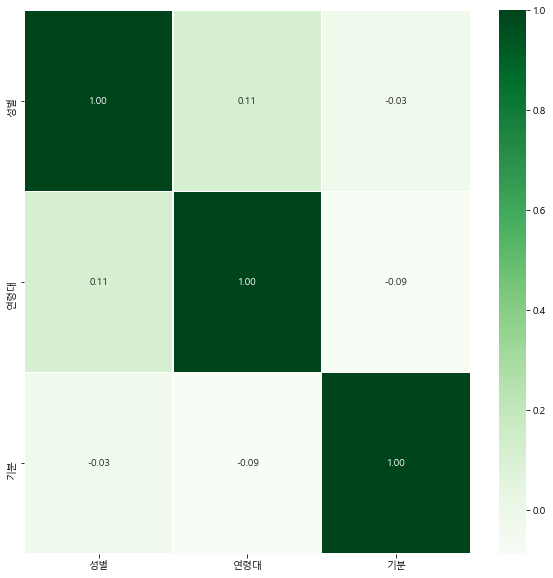

           성별       연령대        기분
성별   1.000000  0.112407 -0.027282
연령대  0.112407  1.000000 -0.087504
기분  -0.027282 -0.087504  1.000000


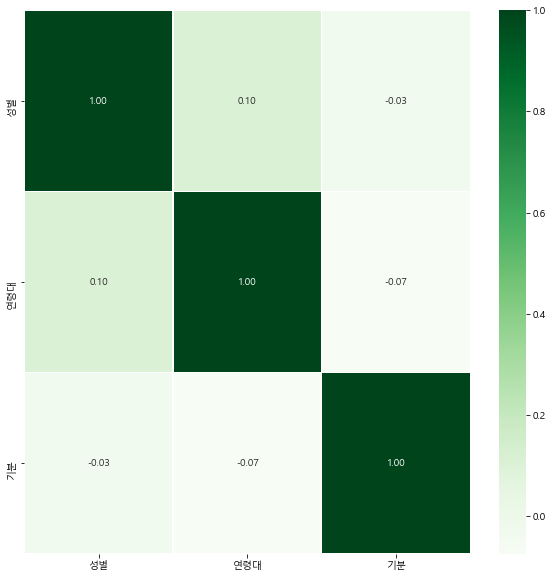

           성별       연령대        기분
성별   1.000000  0.103719 -0.025609
연령대  0.103719  1.000000 -0.074129
기분  -0.025609 -0.074129  1.000000


In [58]:
norminal2 = data[['성별', '연령대', '기분']]

sex = {"남자":0, "여자":1}
age = {"청소년":0, "청년":1, "중장년":2, "노년":3}
feeling = {"행복":0, "중립":1, "분노":2, "우울":3}

norminal2.replace({"성별":sex}, inplace=True)
norminal2.replace({"연령대":age}, inplace=True)
norminal2.replace({"기분":feeling}, inplace=True)

print(norminal2)
print(no_onehot_corr(norminal2, method="spearman"))
print(no_onehot_corr(norminal2, method="kendall"))

### 순서형 (1순위, 2순위, 3순위)

In [59]:
ordinal = data[['1순위', '2순위', '3순위']]
ordinal.head()

,1순위,2순위,3순위
0,한식,일식,중식
1,한식,중식,일식
2,일식,양식,한식
3,일식,한식,분식
4,양식,일식,분식


##### 스피어만 상관계수

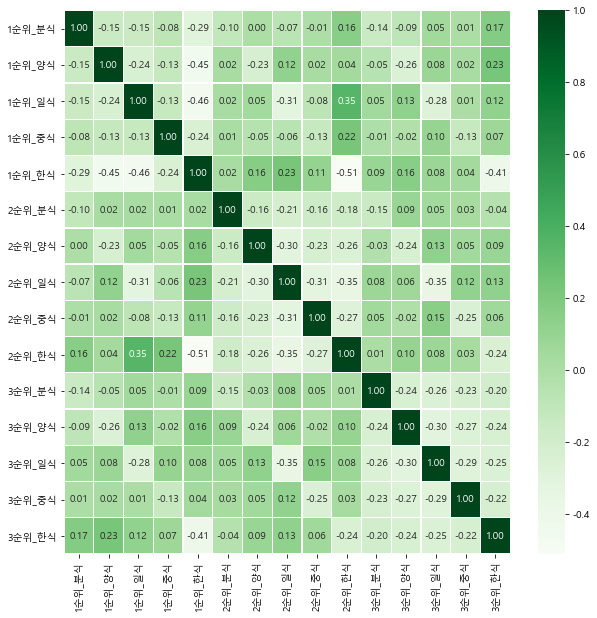

,1순위_분식,1순위_양식,1순위_일식,1순위_중식,1순위_한식,2순위_분식,2순위_양식,2순위_일식,2순위_중식,2순위_한식,3순위_분식,3순위_양식,3순위_일식,3순위_중식,3순위_한식
1순위_분식,1.000000,-0.151389,-0.154917,-0.082457,-0.292587,-0.104857,0.001070,-0.073303,-0.008402,0.159944,-0.141869,-0.087802,0.052122,0.006769,0.174031
1순위_양식,-0.151389,1.000000,-0.236378,-0.125816,-0.446440,0.022712,-0.227388,0.122127,0.024776,0.037580,-0.053992,-0.255920,0.080274,0.015912,0.230943
1순위_일식,-0.154917,-0.236378,1.000000,-0.128748,-0.456846,0.016401,0.046582,-0.314160,-0.075293,0.353567,0.050794,0.128470,-0.279906,0.006637,0.122499
1순위_중식,-0.082457,-0.125816,-0.128748,1.000000,-0.243163,0.009913,-0.048611,-0.060358,-0.128748,0.222884,-0.014331,-0.022538,0.099108,-0.131666,0.067438
1순위_한식,-0.292587,-0.446440,-0.456846,-0.243163,1.000000,0.024579,0.164315,0.225666,0.108483,-0.511652,0.090503,0.159881,0.080804,0.043070,-0.411260
2순위_분식,-0.104857,0.022712,0.016401,0.009913,0.024579,1.000000,-0.157497,-0.212642,-0.163724,-0.183365,-0.149934,0.090218,0.050233,0.030016,-0.040330
2순위_양식,0.001070,-0.227388,0.046582,-0.048611,0.164315,-0.157497,1.000000,-0.302211,-0.232688,-0.260602,-0.032585,-0.237114,0.130946,0.052864,0.089299
2순위_일식,-0.073303,0.122127,-0.314160,-0.060358,0.225666,-0.212642,-0.302211,1.000000,-0.314160,-0.351849,0.075861,0.063734,-0.351358,0.122192,0.127363
2순위_중식,-0.008402,0.024776,-0.075293,-0.128748,0.108483,-0.163724,-0.232688,-0.314160,1.000000,-0.270906,0.050794,-0.016106,0.152613,-0.247370,0.057690
2순위_한식,0.159944,0.037580,0.353567,0.222884,-0.511652,-0.183365,-0.260602,-0.351849,-0.270906,1.000000,0.007095,0.099602,0.078759,0.030997,-0.243874


In [60]:
correlation(ordinal, method="spearman")

##### 켄달 상관계수

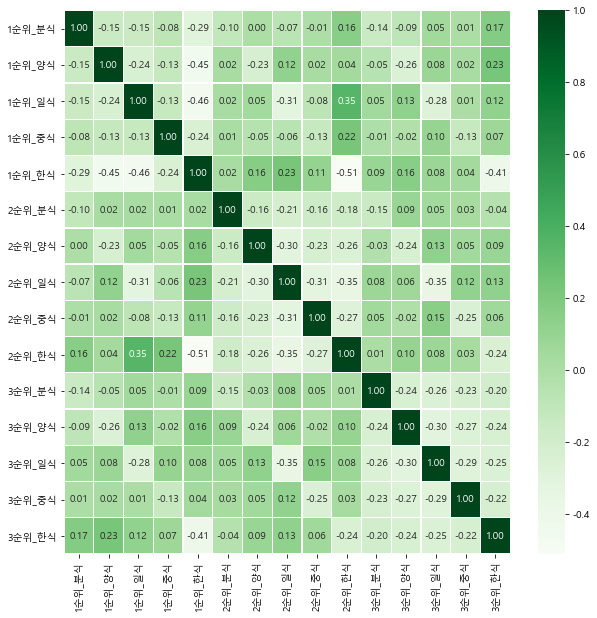

,1순위_분식,1순위_양식,1순위_일식,1순위_중식,1순위_한식,2순위_분식,2순위_양식,2순위_일식,2순위_중식,2순위_한식,3순위_분식,3순위_양식,3순위_일식,3순위_중식,3순위_한식
1순위_분식,1.000000,-0.151389,-0.154917,-0.082457,-0.292587,-0.104857,0.001070,-0.073303,-0.008402,0.159944,-0.141869,-0.087802,0.052122,0.006769,0.174031
1순위_양식,-0.151389,1.000000,-0.236378,-0.125816,-0.446440,0.022712,-0.227388,0.122127,0.024776,0.037580,-0.053992,-0.255920,0.080274,0.015912,0.230943
1순위_일식,-0.154917,-0.236378,1.000000,-0.128748,-0.456846,0.016401,0.046582,-0.314160,-0.075293,0.353567,0.050794,0.128470,-0.279906,0.006637,0.122499
1순위_중식,-0.082457,-0.125816,-0.128748,1.000000,-0.243163,0.009913,-0.048611,-0.060358,-0.128748,0.222884,-0.014331,-0.022538,0.099108,-0.131666,0.067438
1순위_한식,-0.292587,-0.446440,-0.456846,-0.243163,1.000000,0.024579,0.164315,0.225666,0.108483,-0.511652,0.090503,0.159881,0.080804,0.043070,-0.411260
2순위_분식,-0.104857,0.022712,0.016401,0.009913,0.024579,1.000000,-0.157497,-0.212642,-0.163724,-0.183365,-0.149934,0.090218,0.050233,0.030016,-0.040330
2순위_양식,0.001070,-0.227388,0.046582,-0.048611,0.164315,-0.157497,1.000000,-0.302211,-0.232688,-0.260602,-0.032585,-0.237114,0.130946,0.052864,0.089299
2순위_일식,-0.073303,0.122127,-0.314160,-0.060358,0.225666,-0.212642,-0.302211,1.000000,-0.314160,-0.351849,0.075861,0.063734,-0.351358,0.122192,0.127363
2순위_중식,-0.008402,0.024776,-0.075293,-0.128748,0.108483,-0.163724,-0.232688,-0.314160,1.000000,-0.270906,0.050794,-0.016106,0.152613,-0.247370,0.057690
2순위_한식,0.159944,0.037580,0.353567,0.222884,-0.511652,-0.183365,-0.260602,-0.351849,-0.270906,1.000000,0.007095,0.099602,0.078759,0.030997,-0.243874


In [61]:
correlation(ordinal, method="kendall")

### (3) 음식 데이터

In [62]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
             '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

In [63]:
menu_data = data[menu_list]
menu_data

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
417,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
418,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
419,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


##### 스피어만 상관계수

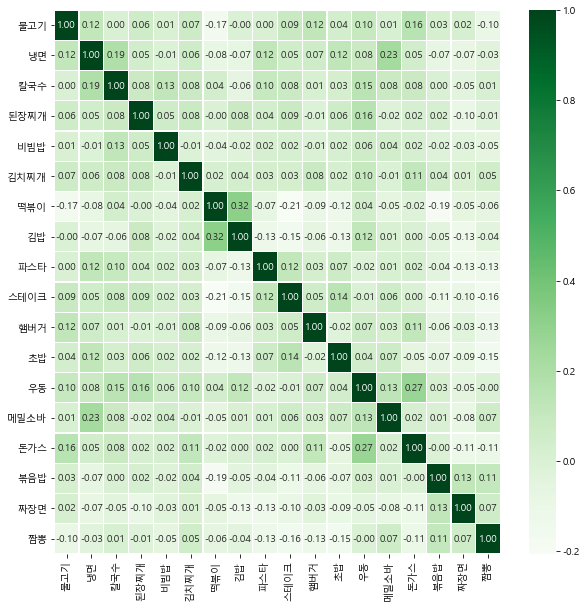

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
불고기,1.000000,0.118262,0.004422,0.058130,0.008108,0.071748,-0.168409,-0.004164,0.002854,0.092695,0.121148,0.037073,0.097189,0.011382,0.155884,0.026167,0.016131,-0.095466
냉면,0.118262,1.000000,0.188637,0.045927,-0.008746,0.056013,-0.079281,-0.074125,0.121574,0.050631,0.065912,0.119808,0.080768,0.230200,0.045042,-0.067058,-0.074475,-0.032856
칼국수,0.004422,0.188637,1.000000,0.076680,0.125881,0.077183,0.035157,-0.063154,0.099163,0.081662,0.010909,0.030614,0.145675,0.076680,0.079756,0.004927,-0.045199,0.012519
된장찌개,0.058130,0.045927,0.076680,1.000000,0.054987,0.084199,-0.003291,0.080617,0.036828,0.088857,-0.011976,0.059378,0.157393,-0.016027,0.021523,0.021583,-0.096044,-0.014419
비빔밥,0.008108,-0.008746,0.125881,0.054987,1.000000,-0.011691,-0.040517,-0.022770,0.017585,0.024314,-0.007705,0.019465,0.063093,0.042634,0.015951,-0.018617,-0.030291,-0.051120
김치찌개,0.071748,0.056013,0.077183,0.084199,-0.011691,1.000000,0.015473,0.037872,0.029917,0.033777,0.082379,0.024339,0.099649,-0.005510,0.110845,0.041066,0.007501,0.050801
떡볶이,-0.168409,-0.079281,0.035157,-0.003291,-0.040517,0.015473,1.000000,0.315950,-0.072488,-0.206151,-0.093251,-0.121455,0.041664,-0.052336,-0.017299,-0.188567,-0.051094,-0.059046
김밥,-0.004164,-0.074125,-0.063154,0.080617,-0.022770,0.037872,0.315950,1.000000,-0.127497,-0.150206,-0.063306,-0.129590,0.117335,0.007154,0.002083,-0.045937,-0.131406,-0.044826
파스타,0.002854,0.121574,0.099163,0.036828,0.017585,0.029917,-0.072488,-0.127497,1.000000,0.116766,0.029803,0.069938,-0.015924,0.012696,0.015661,-0.039394,-0.131195,-0.127051
스테이크,0.092695,0.050631,0.081662,0.088857,0.024314,0.033777,-0.206151,-0.150206,0.116766,1.000000,0.054604,0.143223,-0.006978,0.064214,0.000982,-0.110426,-0.095570,-0.155634


In [64]:
correlation(menu_data, method="spearman")

##### 켄달 상관계수

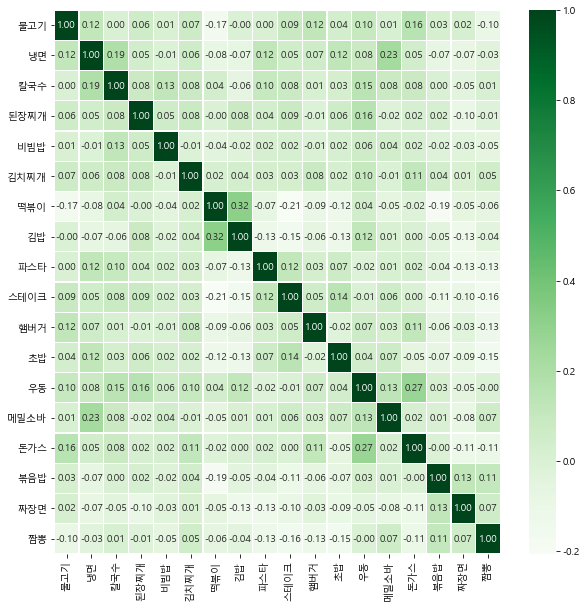

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
불고기,1.000000,0.118262,0.004422,0.058130,0.008108,0.071748,-0.168409,-0.004164,0.002854,0.092695,0.121148,0.037073,0.097189,0.011382,0.155884,0.026167,0.016131,-0.095466
냉면,0.118262,1.000000,0.188637,0.045927,-0.008746,0.056013,-0.079281,-0.074125,0.121574,0.050631,0.065912,0.119808,0.080768,0.230200,0.045042,-0.067058,-0.074475,-0.032856
칼국수,0.004422,0.188637,1.000000,0.076680,0.125881,0.077183,0.035157,-0.063154,0.099163,0.081662,0.010909,0.030614,0.145675,0.076680,0.079756,0.004927,-0.045199,0.012519
된장찌개,0.058130,0.045927,0.076680,1.000000,0.054987,0.084199,-0.003291,0.080617,0.036828,0.088857,-0.011976,0.059378,0.157393,-0.016027,0.021523,0.021583,-0.096044,-0.014419
비빔밥,0.008108,-0.008746,0.125881,0.054987,1.000000,-0.011691,-0.040517,-0.022770,0.017585,0.024314,-0.007705,0.019465,0.063093,0.042634,0.015951,-0.018617,-0.030291,-0.051120
김치찌개,0.071748,0.056013,0.077183,0.084199,-0.011691,1.000000,0.015473,0.037872,0.029917,0.033777,0.082379,0.024339,0.099649,-0.005510,0.110845,0.041066,0.007501,0.050801
떡볶이,-0.168409,-0.079281,0.035157,-0.003291,-0.040517,0.015473,1.000000,0.315950,-0.072488,-0.206151,-0.093251,-0.121455,0.041664,-0.052336,-0.017299,-0.188567,-0.051094,-0.059046
김밥,-0.004164,-0.074125,-0.063154,0.080617,-0.022770,0.037872,0.315950,1.000000,-0.127497,-0.150206,-0.063306,-0.129590,0.117335,0.007154,0.002083,-0.045937,-0.131406,-0.044826
파스타,0.002854,0.121574,0.099163,0.036828,0.017585,0.029917,-0.072488,-0.127497,1.000000,0.116766,0.029803,0.069938,-0.015924,0.012696,0.015661,-0.039394,-0.131195,-0.127051
스테이크,0.092695,0.050631,0.081662,0.088857,0.024314,0.033777,-0.206151,-0.150206,0.116766,1.000000,0.054604,0.143223,-0.006978,0.064214,0.000982,-0.110426,-0.095570,-0.155634


In [65]:
correlation(menu_data, method="kendall")

### (4) 인구통계학적 데이터 + 음식 데이터

In [66]:
total = pd.concat([norminal, menu_data], axis=1)
total.head()

,성별,연령대,기분,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,남자,청년,행복,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,여자,중장년,분노,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,남자,청년,중립,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,여자,청년,행복,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,남자,청년,행복,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0


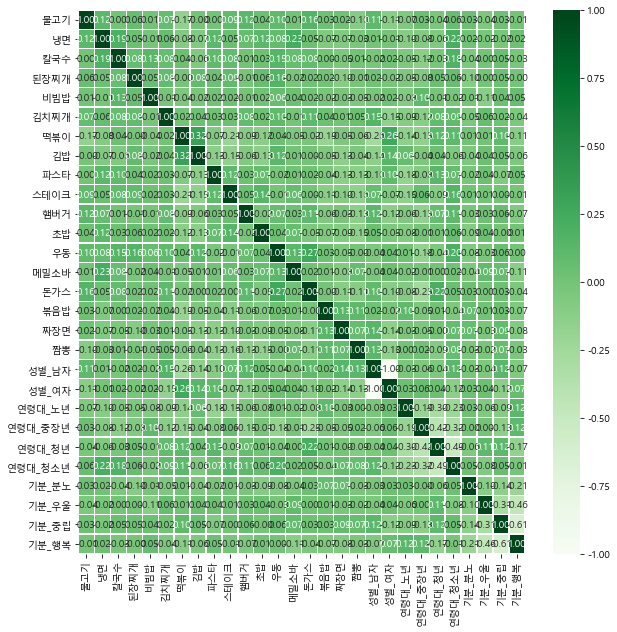

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,...,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복
불고기,1.000000,0.118262,0.004422,0.058130,0.008108,0.071748,-0.168409,-0.004164,0.002854,0.092695,...,0.114950,-0.114950,-0.066946,0.033946,-0.036434,0.057332,0.033920,-0.043418,0.029605,-0.007049
냉면,0.118262,1.000000,0.188637,0.045927,-0.008746,0.056013,-0.079281,-0.074125,0.121574,0.050631,...,0.005748,-0.005748,-0.097970,-0.081575,-0.064882,0.217347,0.015628,-0.020004,-0.017333,0.024884
칼국수,0.004422,0.188637,1.000000,0.076680,0.125881,0.077183,0.035157,-0.063154,0.099163,0.081662,...,-0.017941,0.017941,-0.053792,-0.119027,-0.027814,0.179075,-0.040273,0.001822,0.048913,-0.029112
된장찌개,0.058130,0.045927,0.076680,1.000000,0.054987,0.084199,-0.003291,0.080617,0.036828,0.088857,...,0.019694,-0.019694,-0.051500,-0.075864,0.047529,0.055064,-0.095342,0.000677,0.045754,-0.002460
비빔밥,0.008108,-0.008746,0.125881,0.054987,1.000000,-0.011691,-0.040517,-0.022770,0.017585,0.024314,...,-0.019465,0.019465,-0.083696,0.097280,-0.009948,-0.017828,-0.009416,-0.112547,0.040876,0.054761
김치찌개,0.071748,0.056013,0.077183,0.084199,-0.011691,1.000000,0.015473,0.037872,0.029917,0.033777,...,0.153477,-0.153477,-0.094546,-0.115604,0.080675,0.086527,-0.047026,0.057599,0.015473,-0.039531
떡볶이,-0.168409,-0.079281,0.035157,-0.003291,-0.040517,0.015473,1.000000,0.315950,-0.072488,-0.206151,...,-0.261322,0.261322,-0.137394,-0.154286,0.116732,0.113681,0.012461,0.014844,0.099786,-0.107413
김밥,-0.004164,-0.074125,-0.063154,0.080617,-0.022770,0.037872,0.315950,1.000000,-0.127497,-0.150206,...,-0.137973,0.137973,0.064584,-0.039877,0.041290,-0.055486,-0.039125,0.036987,0.053184,-0.060955
파스타,0.002854,0.121574,0.099163,0.036828,0.017585,0.029917,-0.072488,-0.127497,1.000000,0.116766,...,-0.101328,0.101328,-0.180300,-0.082661,0.127946,0.066634,-0.020399,0.036863,-0.072488,0.045501
스테이크,0.092695,0.050631,0.081662,0.088857,0.024314,0.033777,-0.206151,-0.150206,0.116766,1.000000,...,0.070482,-0.070482,-0.150474,0.055788,-0.089535,0.156120,0.014811,0.006498,0.002617,-0.013612


In [67]:
correlation(total, method="kendall")

# 더미화 데이터 상관관계

## 데이터 불러오기

In [68]:
dumy_data=pd.read_csv("data/kate_data.csv")
dumy_data

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복,구름_구름많음,구름_맑음,구름_흐림,휴일_주말,휴일_평일,식사시간_아침,식사시간_저녁,식사시간_점심,비_비안옴,비_비옴
0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
417,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
418,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
419,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0


## 음식 데이터랑 합치기

In [69]:
full_data=pd.concat([dumy_data,menu_data],axis=1)
full_data
col=full_data.columns

In [70]:
col

Index(['성별_남자', '성별_여자', '연령대_노년', '연령대_중장년', '연령대_청년', '연령대_청소년', '기분_분노',
       '기분_우울', '기분_중립', '기분_행복', '구름_구름많음', '구름_맑음', '구름_흐림', '휴일_주말',
       '휴일_평일', '식사시간_아침', '식사시간_저녁', '식사시간_점심', '비_비안옴', '비_비옴', '불고기', '냉면',
       '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타', '스테이크', '햄버거', '초밥',
       '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕'],
      dtype='object')

## 표준화

In [71]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [72]:
# 데이터 표준화

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(full_data))
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,1.191445,-0.480619,-0.561805,1.530121,-0.411636,-0.547159,1.891054
1,-1.191445,1.191445,-0.367112,1.917753,-0.806834,-0.613039,4.599771,-0.480619,-0.638770,-0.955843,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,1.779977,-0.653543,2.429329,-0.547159,-0.528806
2,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,1.565509,-0.955843,...,-0.664666,1.583772,-0.510371,-0.839317,-0.480619,1.779977,1.530121,-0.411636,-0.547159,-0.528806
3,-1.191445,1.191445,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,1.191445,-0.480619,-0.561805,-0.653543,-0.411636,-0.547159,-0.528806
4,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,1.959357,1.191445,-0.480619,-0.561805,1.530121,-0.411636,-0.547159,-0.528806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,-0.561805,-0.653543,-0.411636,-0.547159,1.891054
417,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,1.779977,-0.653543,-0.411636,1.827623,-0.528806
418,-1.191445,1.191445,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,-0.561805,1.530121,2.429329,-0.547159,-0.528806
419,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,2.080652,-0.638770,-0.955843,...,-0.664666,-0.631404,1.959357,-0.839317,-0.480619,1.779977,-0.653543,-0.411636,-0.547159,-0.528806


In [73]:
# rename 
data_scaled.columns=col
data_scaled

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,1.191445,-0.480619,-0.561805,1.530121,-0.411636,-0.547159,1.891054
1,-1.191445,1.191445,-0.367112,1.917753,-0.806834,-0.613039,4.599771,-0.480619,-0.638770,-0.955843,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,1.779977,-0.653543,2.429329,-0.547159,-0.528806
2,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,1.565509,-0.955843,...,-0.664666,1.583772,-0.510371,-0.839317,-0.480619,1.779977,1.530121,-0.411636,-0.547159,-0.528806
3,-1.191445,1.191445,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,1.191445,-0.480619,-0.561805,-0.653543,-0.411636,-0.547159,-0.528806
4,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,1.959357,1.191445,-0.480619,-0.561805,1.530121,-0.411636,-0.547159,-0.528806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,-0.561805,-0.653543,-0.411636,-0.547159,1.891054
417,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,1.779977,-0.653543,-0.411636,1.827623,-0.528806
418,-1.191445,1.191445,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.664666,-0.631404,-0.510371,-0.839317,-0.480619,-0.561805,1.530121,2.429329,-0.547159,-0.528806
419,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,2.080652,-0.638770,-0.955843,...,-0.664666,-0.631404,1.959357,-0.839317,-0.480619,1.779977,-0.653543,-0.411636,-0.547159,-0.528806


## 상관관계 시각화

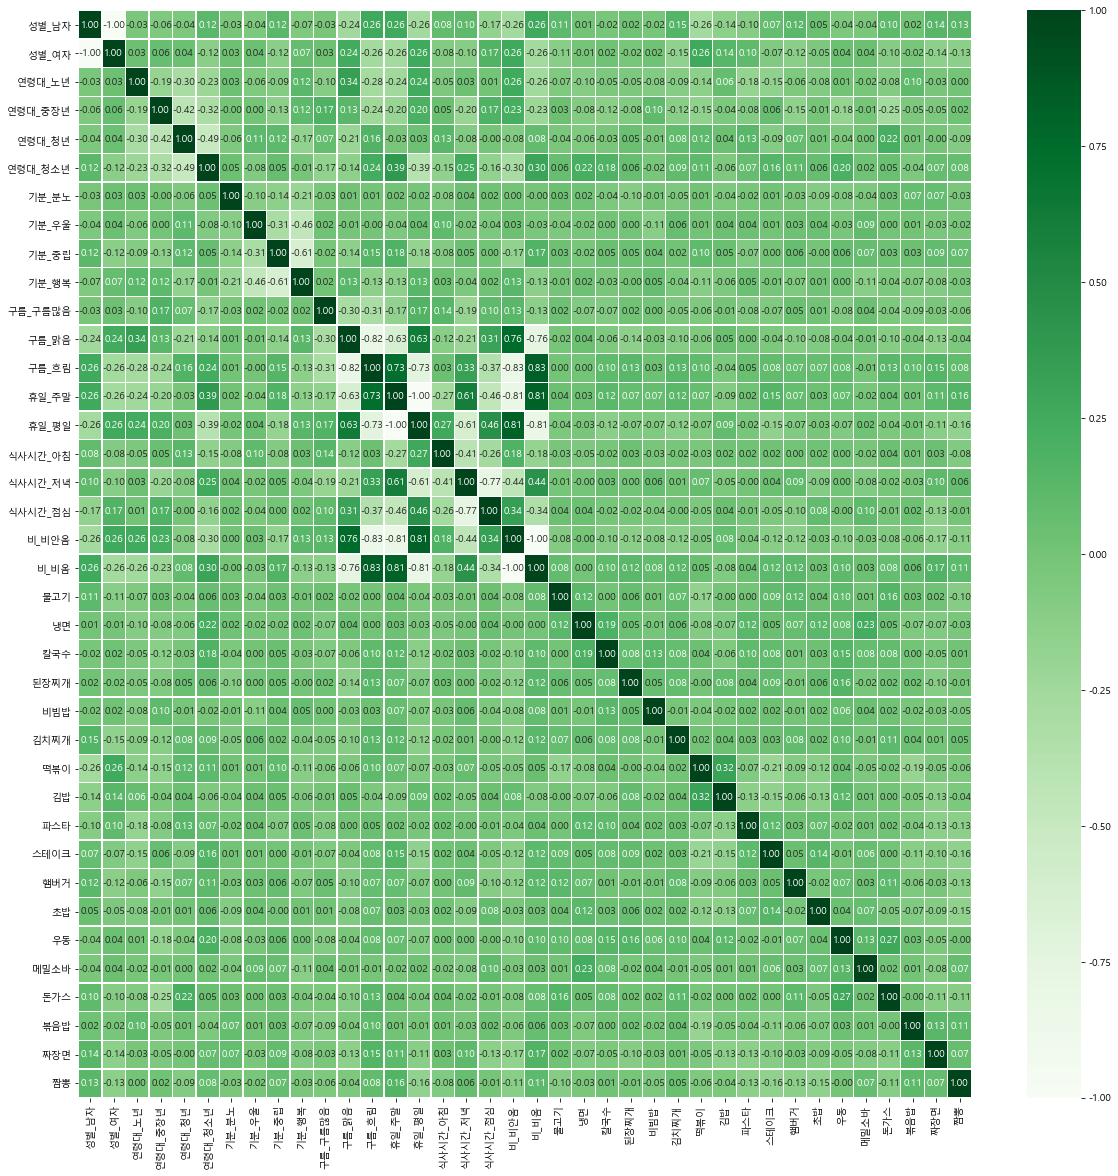

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복,...,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
성별_남자,1.000000,-1.000000,-0.034814,-0.056510,-0.043350,0.124815,-0.026658,-0.041378,0.121455,-0.066889,...,-0.101328,0.070482,0.118622,0.048141,-0.041378,-0.036786,0.095600,0.016601,0.138496,0.128676
성별_여자,-1.000000,1.000000,0.034814,0.056510,0.043350,-0.124815,0.026658,0.041378,-0.121455,0.066889,...,0.101328,-0.070482,-0.118622,-0.048141,0.041378,0.036786,-0.095600,-0.016601,-0.138496,-0.128676
연령대_노년,-0.034814,0.034814,1.000000,-0.191428,-0.296198,-0.225054,0.026296,-0.063608,-0.088841,0.119481,...,-0.180300,-0.150474,-0.060430,-0.084468,0.011614,-0.017112,-0.079594,0.099192,-0.026506,0.001308
연령대_중장년,-0.056510,0.056510,-0.191428,1.000000,-0.420718,-0.319665,-0.001724,0.001657,-0.128743,0.116353,...,-0.082661,0.055788,-0.151657,-0.014085,-0.176418,-0.008025,-0.252224,-0.050045,-0.051409,0.018683
연령대_청년,-0.043350,0.043350,-0.296198,-0.420718,1.000000,-0.494621,-0.058339,0.110177,0.116732,-0.167897,...,0.127946,-0.089535,0.068374,0.013739,-0.039210,0.002001,0.215650,0.013087,-0.002851,-0.085572
연령대_청소년,0.124815,-0.124815,-0.225054,-0.319665,-0.494621,1.000000,0.046479,-0.076181,0.054929,-0.009658,...,0.066634,0.156120,0.108420,0.059219,0.196890,0.017613,0.053337,-0.040326,0.069672,0.075713
기분_분노,-0.026658,0.026658,0.026296,-0.001724,-0.058339,0.046479,1.000000,-0.104487,-0.138870,-0.207802,...,-0.020399,0.014811,-0.026178,-0.089524,-0.075181,-0.041752,0.032820,0.073044,0.071256,-0.031898
기분_우울,-0.041378,0.041378,-0.063608,0.001657,0.110177,-0.076181,-0.104487,1.000000,-0.307005,-0.459396,...,0.036863,0.006498,0.025161,0.041378,-0.028425,0.086158,0.004733,0.009566,-0.031812,-0.018603
기분_중립,0.121455,-0.121455,-0.088841,-0.128743,0.116732,0.054929,-0.138870,-0.307005,1.000000,-0.610564,...,-0.072488,0.002617,0.061922,-0.004496,0.055075,0.070276,0.028434,0.034555,0.085679,0.067653
기분_행복,-0.066889,0.066889,0.119481,0.116353,-0.167897,-0.009658,-0.207802,-0.459396,-0.610564,1.000000,...,0.045501,-0.013612,-0.065028,0.008946,0.003443,-0.113822,-0.043165,-0.069219,-0.082566,-0.033648


In [74]:
no_onehot_corr(data_scaled, method="pearson",size=20)

## pvalue 

In [75]:
from scipy import stats

In [76]:
# 전체 데이터 상관관계 및 pvalue
suggestive_evidence=[]
significant=[]

for x in col[:20]:
    for y in col[20:]:
#         print(x,y,stats.pearsonr(data_scaled[x], data_scaled[y]))
            # 제안적인 증거
        if 0.005<stats.pearsonr(data_scaled[x], data_scaled[y])[1]<0.05:
            print(x,y,stats.pearsonr(data_scaled[x], data_scaled[y]))
            #유의미
        elif stats.pearsonr(data_scaled[x], data_scaled[y])[1]<0.005:
            
            print("*",x,y,stats.pearsonr(data_scaled[x], data_scaled[y]))
            
        

성별_남자 불고기 (0.11494960952460231, 0.018305400989852356)
* 성별_남자 김치찌개 (0.15347714688429057, 0.0015860635541018447)
* 성별_남자 떡볶이 (-0.2613219190447812, 5.305325929341199e-08)
* 성별_남자 김밥 (-0.13797342315997452, 0.004566285450233937)
성별_남자 파스타 (-0.1013284337649276, 0.037685800290173495)
성별_남자 햄버거 (0.11862201950318248, 0.014879948017978307)
성별_남자 돈가스 (0.09559994807055103, 0.049971654889505245)
* 성별_남자 짜장면 (0.13849570626604105, 0.004413650477966332)
성별_남자 짬뽕 (0.1286757194054114, 0.00820895255355568)
성별_여자 불고기 (-0.11494960952460231, 0.018305400989852356)
* 성별_여자 김치찌개 (-0.15347714688429057, 0.0015860635541018447)
* 성별_여자 떡볶이 (0.2613219190447812, 5.305325929341199e-08)
* 성별_여자 김밥 (0.13797342315997452, 0.004566285450233937)
성별_여자 파스타 (0.1013284337649276, 0.037685800290173495)
성별_여자 햄버거 (-0.11862201950318248, 0.014879948017978307)
성별_여자 돈가스 (-0.09559994807055103, 0.049971654889505245)
* 성별_여자 짜장면 (-0.13849570626604105, 0.004413650477966332)
성별_여자 짬뽕 (-0.1286757194054114, 0.00820895255355568)
연령대_노년 냉면

In [77]:
#빈 데이터 프레임 생성
corr_result=pd.DataFrame(columns=["x","y","corr","p-value"] ,index=(range(0)))
corr_result

,x,y,corr,p-value


In [78]:
# 값 채워넣기
for x in col[:20]:
    for y in col[20:]:
        corr=pd.DataFrame(columns=["x","y","corr","p-value"] ,index=(range(1)))
        corr["x"]=x
        corr["y"]=y
        corr["corr"]=stats.pearsonr(data_scaled[x], data_scaled[y])[0]
        corr["p-value"]=stats.pearsonr(data_scaled[x], data_scaled[y])[1]
        corr_result=pd.concat([corr_result,corr])

        

In [79]:
corr_result=corr_result.reset_index(drop=True)

In [80]:
corr_result["abs_corr"]=abs(corr_result["corr"])


## 상관분석 결과 파일 저장

In [81]:

corr_result=corr_result.sort_values(by=['abs_corr'], axis=0,ascending=False).drop(["abs_corr"],axis=1).reset_index(drop=True)
corr_result

,x,y,corr,p-value
0,성별_남자,떡볶이,-0.261322,5.305326e-08
1,성별_여자,떡볶이,0.261322,5.305326e-08
2,연령대_중장년,돈가스,-0.252224,1.564154e-07
3,연령대_청소년,냉면,0.217347,6.787752e-06
4,연령대_청년,돈가스,0.215650,8.035320e-06
...,...,...,...,...
355,구름_흐림,불고기,0.000690,9.887389e-01
356,식사시간_저녁,된장찌개,0.000690,9.887425e-01
357,기분_우울,된장찌개,0.000677,9.889531e-01
358,식사시간_저녁,우동,0.000348,9.943171e-01


In [82]:
corr_result.to_csv("data/corr_result.csv",index=False)